# Mercedes-Benz Greener Manufacturing

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. .

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.

This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

# Exploratory Data Analysis

In [111]:
#import the necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib_venn import venn2, venn2_circles
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [112]:
#import train and test data sets
train_set=pd.read_csv("C:/Users/iamgo/PG_AL_ML_Simplilearn/ML/Assesment/Project 1 - Mercedes-Benz Greener Manufacturing/Dataset for the project/train.csv")
test_set=pd.read_csv("C:/Users/iamgo/PG_AL_ML_Simplilearn/ML/Assesment/Project 1 - Mercedes-Benz Greener Manufacturing/Dataset for the project/test.csv")

In [113]:
#display training set
train_set

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [114]:
#display test set
test_set

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


###    KEY TAKE-AWAYS
    1. Training set contains 4209 rows of data.
    2. Test set contains 4209 rows of data.
    3. The train and test set are of equally size.
    4. There are 377 features and 1 target variable.
    5. 'y' is the target variable, i.e the time to pass testing.
    6. Target 'y' is a continuous variable (time).
    7. ID of the test setup is given as a feature.
    8. Various parameters of the setup are given as X0, X1, X2 etc.
    9. Few names of the test parameters(eg. X7, X381 etc.) are not shown in the feature list.

In [115]:
#checking the data types of the features
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


<AxesSubplot:ylabel='count'>

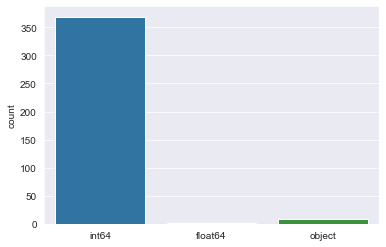

In [116]:
#visualizing the number of different data-types 
sns.set_style("darkgrid")
sns.countplot(train_set.dtypes.map(str))

###    KEY TAKE-AWAYS    
    1. Target is continuous variable.
    2. There are 368 numarical features.
    3. There are 8 categorical features.
    4. Majority of the features are numarical in nature.

In [117]:
#checking the number of missing values for training set
train_set.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [118]:
#checking the sum of the results to see if there are any null values for training set
train_set.isnull().sum().sum()

0

In [119]:
#checking the sum of the results to see if there are any null values for testing set
test_set.isnull().sum().sum()

0

### KEY TAKE-AWAYS

    1. There are no null values in the test and train set

In [120]:
#checking the summary of the categorical features in train set
train_set.describe(include=['object'])

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


Unique elemnts (Train Set): X0
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
Number of unique elements (Train Set): 47

Unique elemnts (Train Set): X1
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
Number of unique elements (Train Set): 27

Unique elemnts (Train Set): X2
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
Number of unique elements (Train Set): 44

Unique elemnts (Train Set): X3
['a' 'e' 'c' 'f' 'd' 'b' 'g']
Number of unique elements (Train Set): 7

Unique elemnts (Train Set): X4
['d' 'b' 'c' 'a']
Number of unique elements (Train Set): 4

Unique elemnts (Train Set): X5
['u' 'y' 'x' 'h' 'g' 'f' 

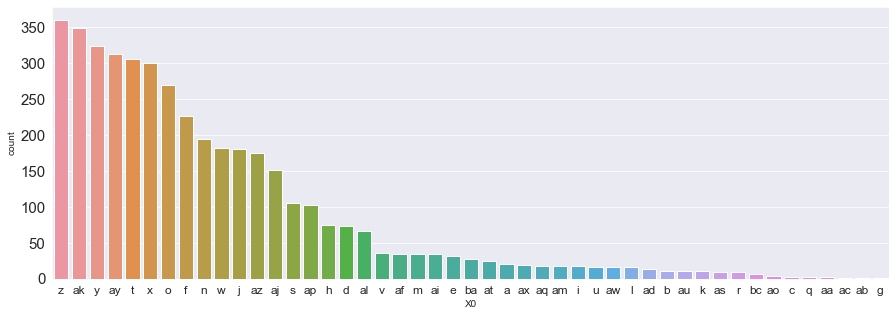

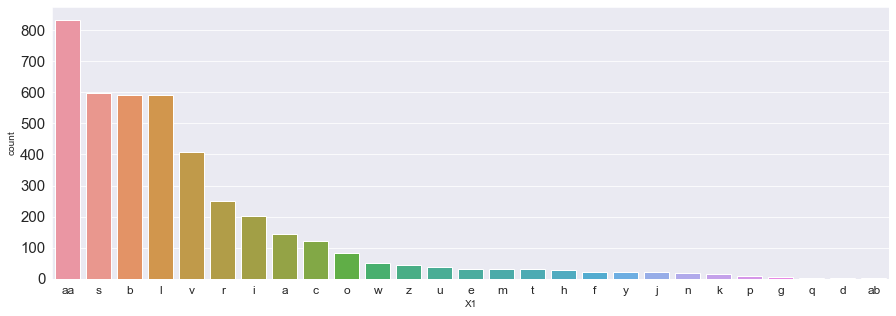

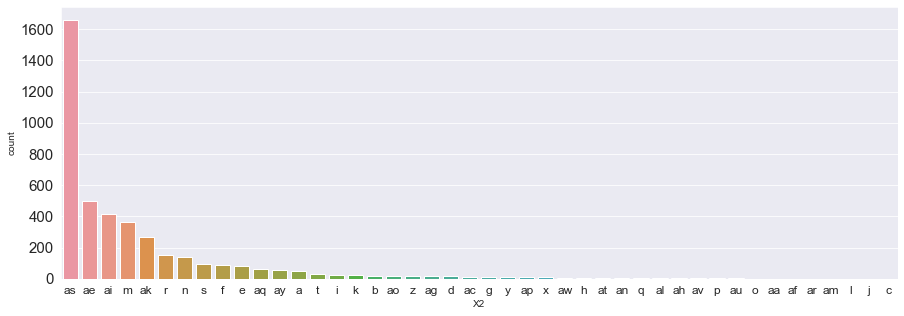

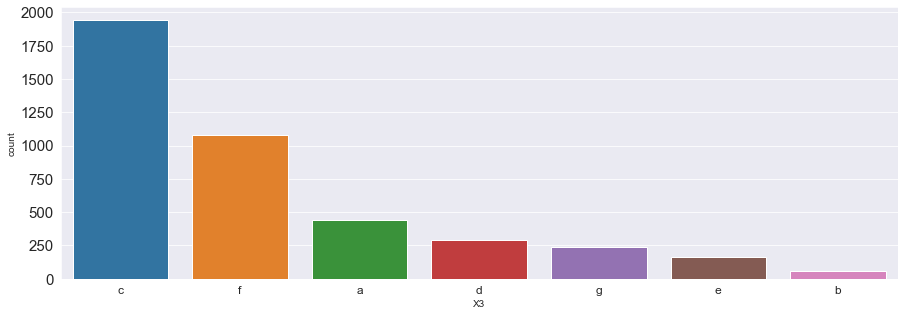

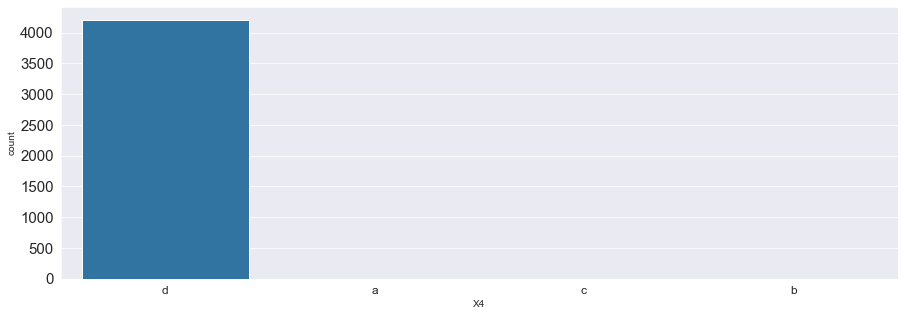

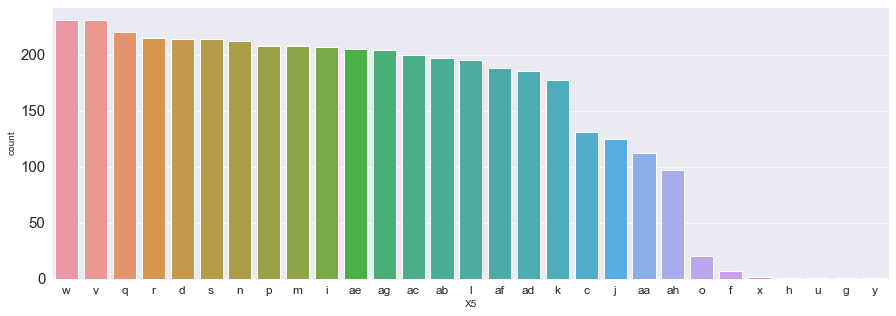

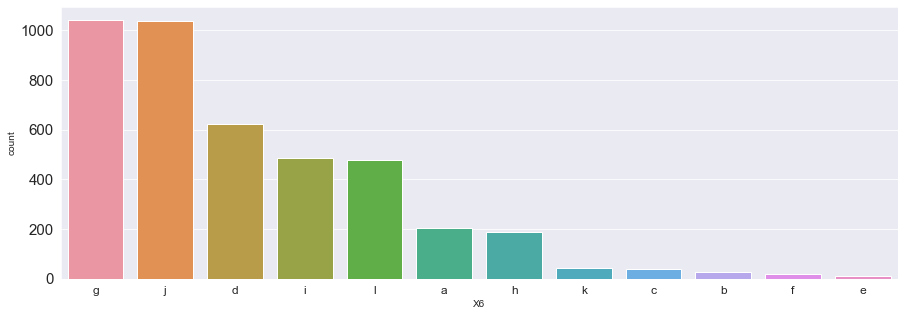

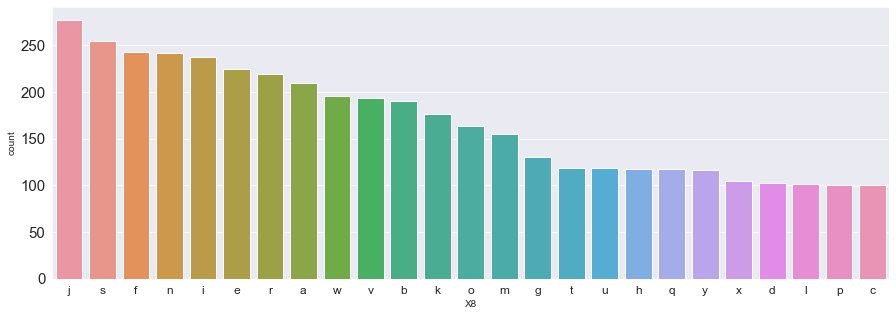

In [121]:
#checking and plotting the unique values of categorical features and its count o training data set
for i in range(2, 10):
    print("Unique elemnts (Train Set):",train_set.columns[i])
    print(train_set[train_set.columns[i]].unique())
    print("Number of unique elements (Train Set):",len(train_set[train_set.columns[i]].unique()))
    print()
    plt.figure(figsize=(15,5))
    sns.countplot(x=train_set.columns[i], data=train_set, order=train_set[train_set.columns[i]].value_counts().index)
    plt.xticks(size=12)
    plt.yticks(size=15)

In [122]:
#checking the summary of the categorical features in train set
test_set.describe(include=['object'])

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


Unique elemnts (Test Set): X0
['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
Number of unique elements (Test Set): 49

Unique elemnts (Test Set): X1
['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
Number of unique elements (Test Set): 27

Unique elemnts (Test Set): X2
['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']
Number of unique elements (Test Set): 45

Unique elemnts (Test Set): X3
['f' 'a' 'c' 'e' 'd' 'g' 'b']
Number of unique elements (Test Set): 7

Unique elemnts (Test Set): X4
['d' 'b' 'a' 'c']
Number of unique elements (Test Set): 4

Unique elemnts (Test Set): X5
['t' 'b' 'a' 'z' 'y

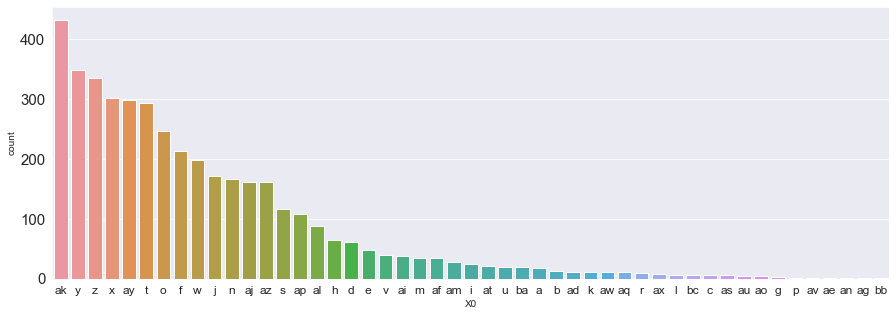

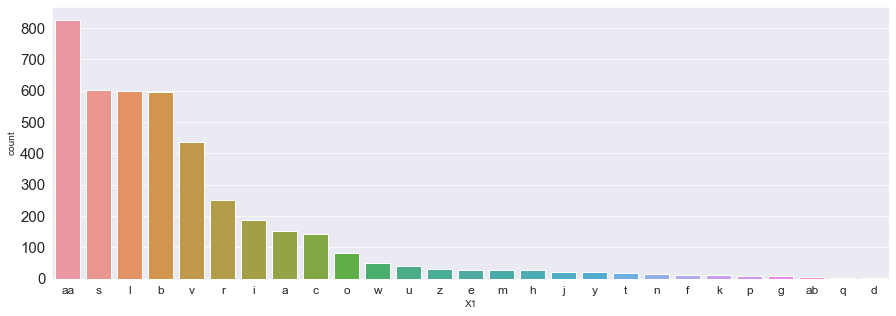

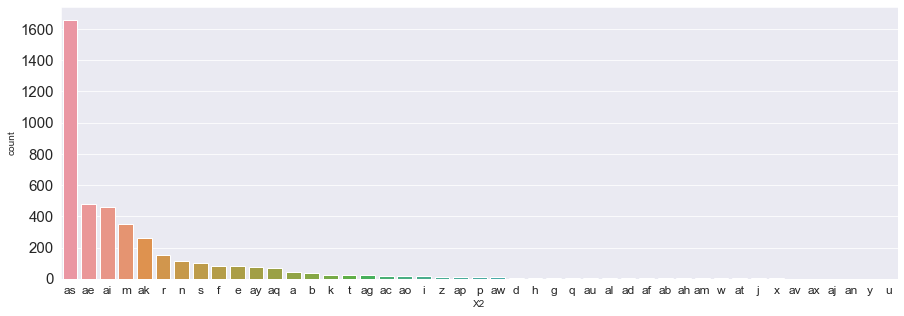

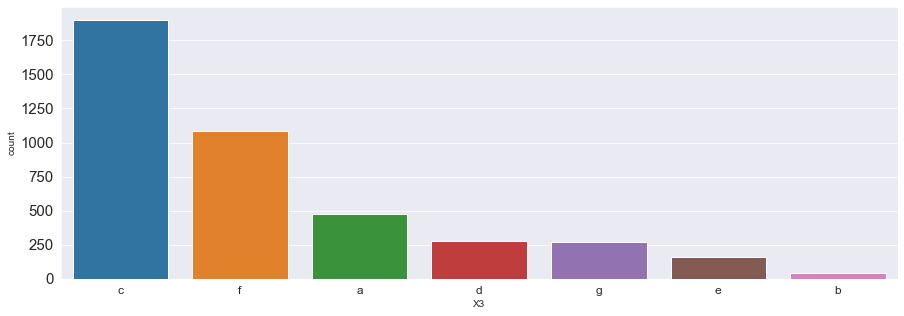

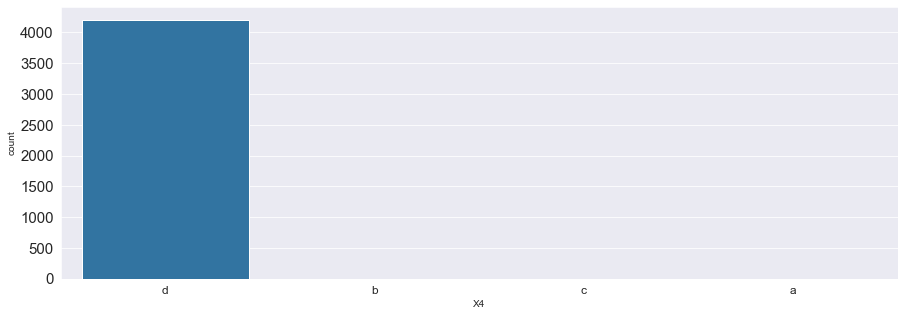

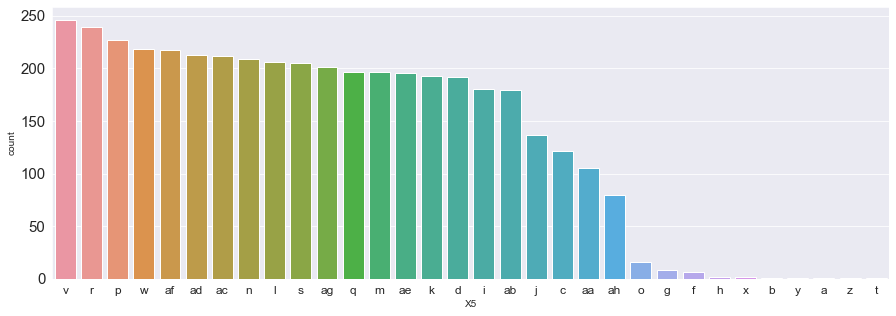

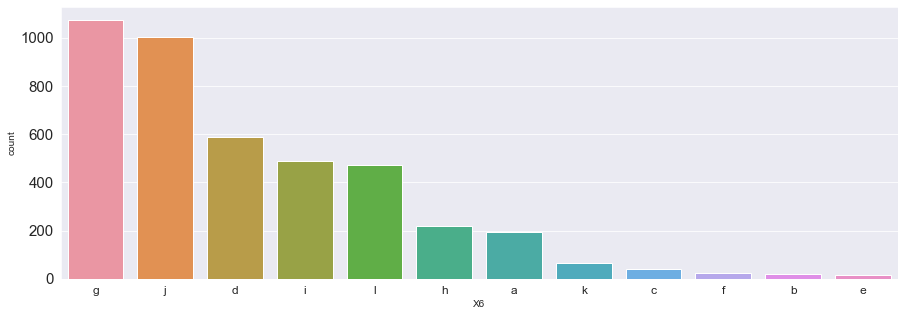

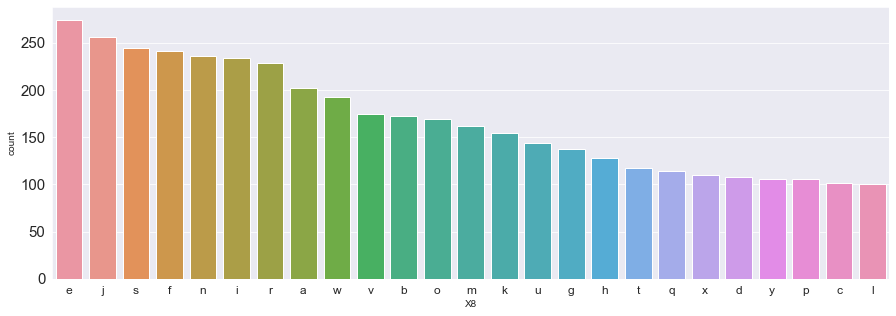

In [123]:
#checking and plotting the unique values of categorical features and its count o testing data set
for i in range(1, 9):
    print("Unique elemnts (Test Set):",test_set.columns[i])
    print(test_set[test_set.columns[i]].unique())
    print("Number of unique elements (Test Set):",len(test_set[test_set.columns[i]].unique()))
    print()
    plt.figure(figsize=(15,5))
    sns.countplot(x=test_set.columns[i], data=test_set, order=test_set[test_set.columns[i]].value_counts().index)
    plt.xticks(size=12)
    plt.yticks(size=15)

### KEY TAKE-AWAYS

    1. X4 retains a constant config for a large majority of the data points in train and test.
    2. X4 is less likely to affect the predictions in a major way

Unique elemnts (Traitrain_set[train_set.columns[i+1]].unique()n Set): X0
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
Number of unique elements (Train Set): 47

Unique elemnts (Test Set): X0
['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
Number of unique elements (Test Set): 49

Train only:  ['aa' 'ab' 'ac' 'q']
Train and Test :  ['a' 'ad' 'af' 'ai' 'aj' 'ak' 'al' 'am' 'ao' 'ap' 'aq' 'as' 'at' 'au' 'aw'
 'ax' 'ay' 'az' 'b' 'ba' 'bc' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm'
 'n' 'o' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
Test only:  ['ae' 'ag' 'an' 'av' 'bb' 'p']


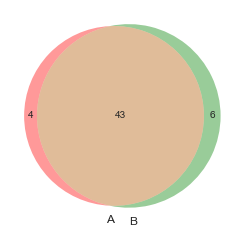



Unique elemnts (Traitrain_set[train_set.columns[i+1]].unique()n Set): X1
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
Number of unique elements (Train Set): 27

Unique elemnts (Test Set): X1
['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
Number of unique elements (Test Set): 27

Train only:  []
Train and Test :  ['a' 'aa' 'ab' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p'
 'q' 'r' 's' 't' 'u' 'v' 'w' 'y' 'z']
Test only:  []


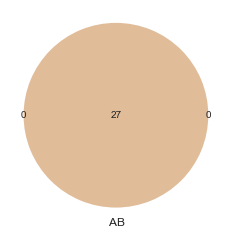



Unique elemnts (Traitrain_set[train_set.columns[i+1]].unique()n Set): X2
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
Number of unique elements (Train Set): 44

Unique elemnts (Test Set): X2
['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']
Number of unique elements (Test Set): 45

Train only:  ['aa' 'ar' 'c' 'l' 'o']
Train and Test :  ['a' 'ac' 'ae' 'af' 'ag' 'ah' 'ai' 'ak' 'al' 'am' 'an' 'ao' 'ap' 'aq' 'as'
 'at' 'au' 'av' 'aw' 'ay' 'b' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'm' 'n' 'p'
 'q' 'r' 's' 't' 'x' 'y' 'z']
Test only:  ['ab' 'ad' 'aj' 'ax' 'u' 'w']


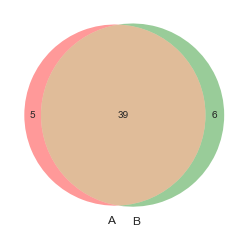



Unique elemnts (Traitrain_set[train_set.columns[i+1]].unique()n Set): X3
['a' 'e' 'c' 'f' 'd' 'b' 'g']
Number of unique elements (Train Set): 7

Unique elemnts (Test Set): X3
['f' 'a' 'c' 'e' 'd' 'g' 'b']
Number of unique elements (Test Set): 7

Train only:  []
Train and Test :  ['a' 'b' 'c' 'd' 'e' 'f' 'g']
Test only:  []


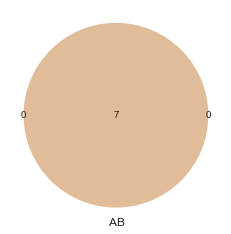



Unique elemnts (Traitrain_set[train_set.columns[i+1]].unique()n Set): X4
['d' 'b' 'c' 'a']
Number of unique elements (Train Set): 4

Unique elemnts (Test Set): X4
['d' 'b' 'a' 'c']
Number of unique elements (Test Set): 4

Train only:  []
Train and Test :  ['a' 'b' 'c' 'd']
Test only:  []


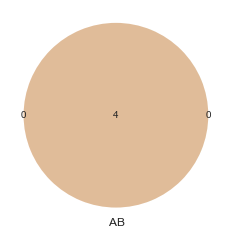



Unique elemnts (Traitrain_set[train_set.columns[i+1]].unique()n Set): X5
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
Number of unique elements (Train Set): 29

Unique elemnts (Test Set): X5
['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
Number of unique elements (Test Set): 32

Train only:  ['u']
Train and Test :  ['aa' 'ab' 'ac' 'ad' 'ae' 'af' 'ag' 'ah' 'c' 'd' 'f' 'g' 'h' 'i' 'j' 'k'
 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 'v' 'w' 'x' 'y']
Test only:  ['a' 'b' 't' 'z']


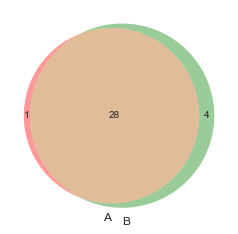



Unique elemnts (Traitrain_set[train_set.columns[i+1]].unique()n Set): X6
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
Number of unique elements (Train Set): 12

Unique elemnts (Test Set): X6
['a' 'g' 'j' 'l' 'i' 'd' 'f' 'h' 'c' 'k' 'e' 'b']
Number of unique elements (Test Set): 12

Train only:  []
Train and Test :  ['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l']
Test only:  []


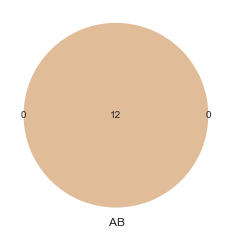



Unique elemnts (Traitrain_set[train_set.columns[i+1]].unique()n Set): X8
['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']
Number of unique elements (Train Set): 25

Unique elemnts (Test Set): X8
['w' 'y' 'j' 'n' 'm' 's' 'a' 'v' 'r' 'o' 't' 'h' 'c' 'k' 'p' 'u' 'd' 'g'
 'b' 'q' 'e' 'l' 'f' 'i' 'x']
Number of unique elements (Test Set): 25

Train only:  []
Train and Test :  ['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y']
Test only:  []


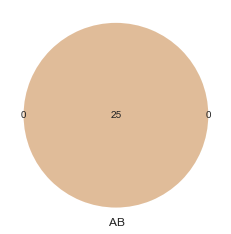

In [124]:
for i in range(1, 9):
    print("Unique elemnts (Traitrain_set[train_set.columns[i+1]].unique()n Set):",train_set.columns[i+1])
    train=train_set[train_set.columns[i+1]].unique()
    print(train)
    print("Number of unique elements (Train Set):",len(train))
    print()
    print("Unique elemnts (Test Set):",test_set.columns[i])
    test=test_set[test_set.columns[i]].unique()
    print(test)
    print("Number of unique elements (Test Set):",len(test))
    print()
    print("Train only: ", np.setdiff1d(train, test))
    print("Train and Test : ", np.intersect1d(train, test))
    print("Test only: ", np.setdiff1d(test, train))
    venn2([set(train), set(test)])
    plt.show()
    print()
    print()

### KEY TAKE-AWAYS

    1. There are few configs in X0, X2, X5 that are present only in test and only in train.
    2. All configs are common in X1, X3, X4, X6, X8

<AxesSubplot:>

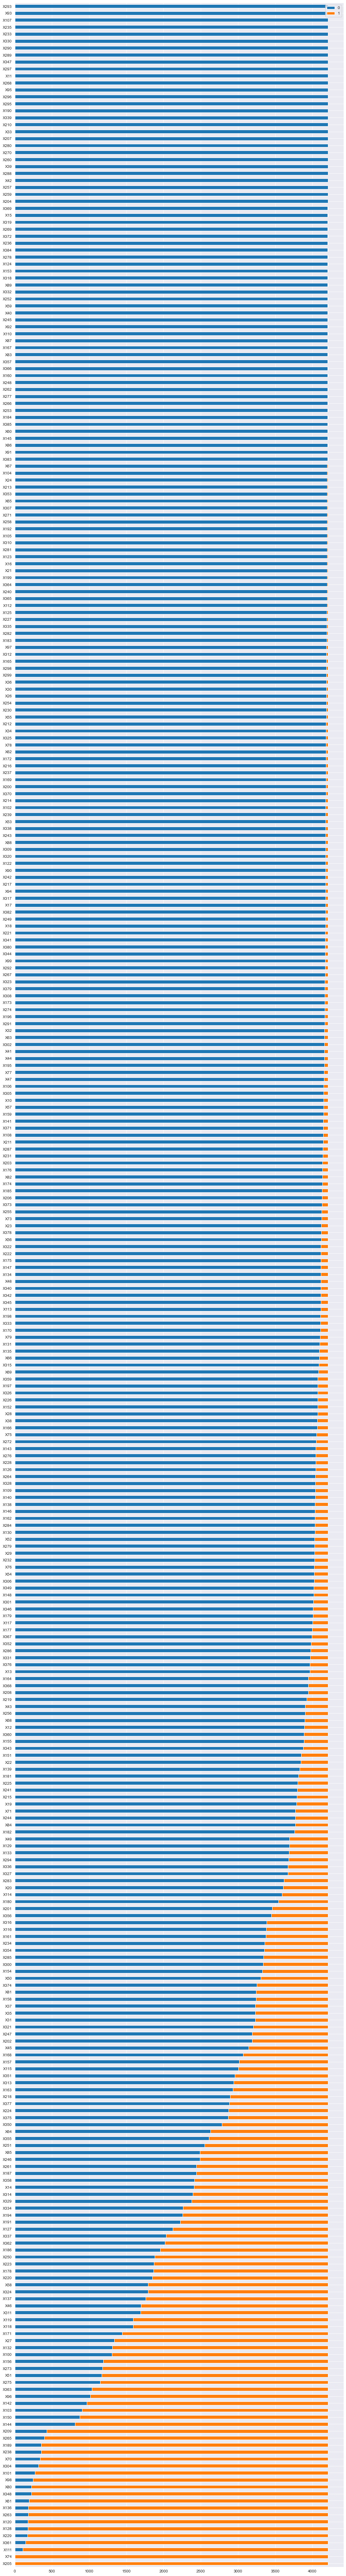

In [125]:
#vizualizing the distribution of binary values in the numarical features of training set
sel_data=train_set.iloc[:,10:]
freq={}
for i in sel_data.columns:
    freq[i]=sel_data[i].value_counts()
freq_df=pd.DataFrame(freq)
freq_df=freq_df.fillna(0)
freq_df_trans=freq_df.transpose()
freq_df_trans_sort=freq_df_trans.sort_values(by = 1,ascending = False)
freq_df_trans_sort.plot(kind="barh", stacked=True, figsize=(15,120))

<AxesSubplot:>

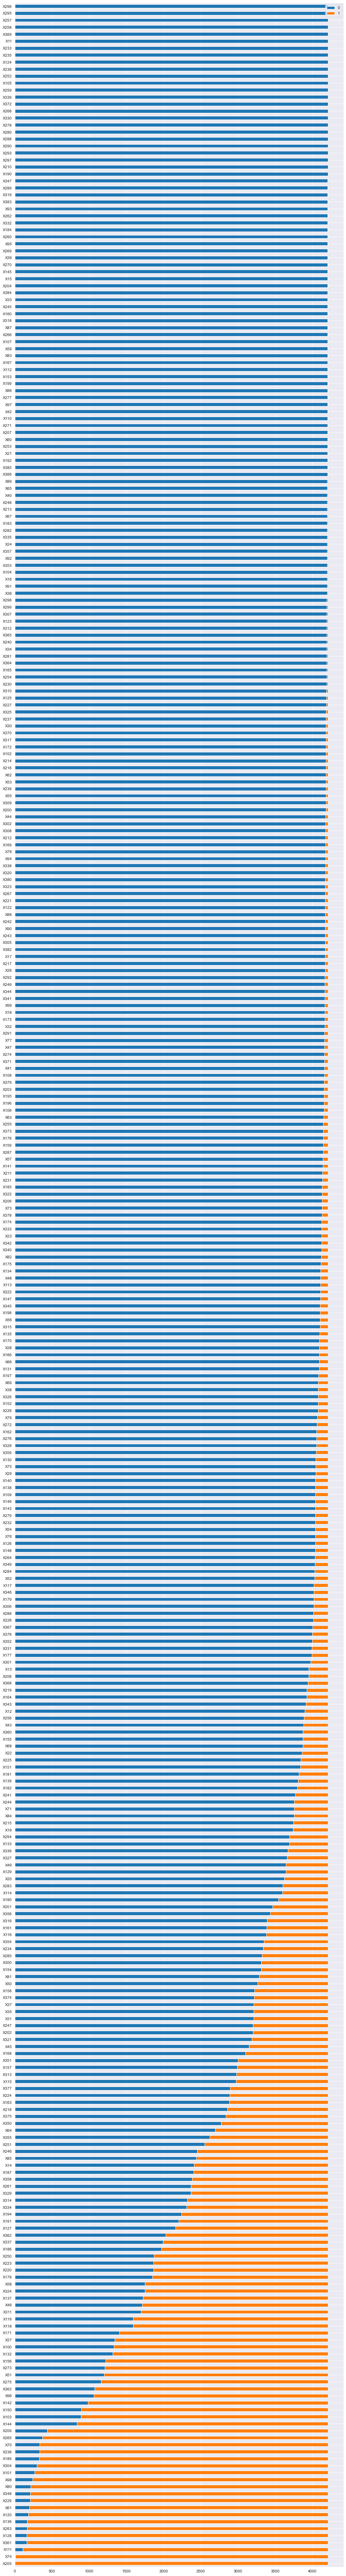

In [126]:
#vizualizing the distribution of binary values in the numarical features of testing set
sel_data=test_set.iloc[:,10:]
freq={}
for i in sel_data.columns:
    freq[i]=sel_data[i].value_counts()
freq_df=pd.DataFrame(freq)
freq_df=freq_df.fillna(0)
freq_df_trans=freq_df.transpose()
freq_df_trans_sort=freq_df_trans.sort_values(by = 1,ascending = False)
freq_df_trans_sort.plot(kind="barh", stacked=True, figsize=(15,120))

### KEY TAKE-AWAYS

    1. The graph dispalys the distribution of "1" and "0" in each of numarical features.
    2. Feature with highest number of "1" is at top and lowest number of "1" is at the bottom.
    3. We can infer that the config shown at top of the graph have been used often in the training data set.

In [127]:
#checking the numarial features of training set
ON_config=[]
OFF_config=[]
for i in range(10, 377):
    print("Unique elemnts (Train Set):",train_set.columns[i])
    unique_elems=train_set[train_set.columns[i]].unique()
    print(train_set[train_set.columns[i]].value_counts())
    print("Number of unique elements (Train Set):",len(unique_elems))
    
    if len(unique_elems) == 1:
        if unique_elems == 1:
            ON_config.append(train_set.columns[i])
        else:
            OFF_config.append(train_set.columns[i])
    
    print("\n")
    
print("Config only ON: ", ON_config)
print("Total no. of only ON config : ", len(ON_config))
print("Config only OFF: ", OFF_config)
print("Total no. of only OFF config : ", len(OFF_config))

Unique elemnts (Train Set): X10
0    4153
1      56
Name: X10, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X11
0    4209
Name: X11, dtype: int64
Number of unique elements (Train Set): 1


Unique elemnts (Train Set): X12
0    3893
1     316
Name: X12, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X13
0    3965
1     244
Name: X13, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X14
0    2407
1    1802
Name: X14, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X15
0    4207
1       2
Name: X15, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X16
0    4198
1      11
Name: X16, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X17
0    4177
1      32
Name: X17, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X18
0    4176
1      33
Name: 

0    4107
1     102
Name: X170, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X171
1    2767
0    1442
Name: X171, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X172
0    4184
1      25
Name: X172, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X173
0    4168
1      41
Name: X173, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X174
0    4136
1      73
Name: X174, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X175
0    4115
1      94
Name: X175, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X176
0    4137
1      72
Name: X176, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X177
0    3998
1     211
Name: X177, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X178
1    2346
0    1863
Name: X178, 

Name: X258, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X259
0    4208
1       1
Name: X259, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X260
0    4208
1       1
Name: X260, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X261
0    2443
1    1766
Name: X261, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X262
0    4203
1       6
Name: X262, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X263
1    4028
0     181
Name: X263, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X264
0    4043
1     166
Name: X264, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X265
1    3811
0     398
Name: X265, dtype: int64
Number of unique elements (Train Set): 2


Unique elemnts (Train Set): X266
0    4203
1       6
Name: X266, dtype: int64
Number 

In [128]:
#checking the numarial features of testing set
ON_config=[]
OFF_config=[]
for i in range(9, 376):
    print("Unique elemnts (Test Set):",test_set.columns[i])
    unique_elems=test_set[test_set.columns[i]].unique()
    print(test_set[test_set.columns[i]].value_counts())
    print("Number of unique elements (Test Set):",len(unique_elems))
    
    if len(unique_elems) == 1:
        if unique_elems == 1:
            ON_config.append(test_set.columns[i])
        else:
            OFF_config.append(test_set.columns[i])
    
    print("\n")
    
print("Config only ON: ", ON_config)
print("Total no. of only ON config : ", len(ON_config))
print("Config only OFF: ", OFF_config)
print("Total no. of only OFF config : ", len(OFF_config))

Unique elemnts (Test Set): X10
0    4129
1      80
Name: X10, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X11
0    4208
1       1
Name: X11, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X12
0    3896
1     313
Name: X12, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X13
0    3952
1     257
Name: X13, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X14
0    2408
1    1801
Name: X14, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X15
0    4206
1       3
Name: X15, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X16
0    4198
1      11
Name: X16, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X17
0    4172
1      37
Name: X17, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X18
0    4166
1      43
Name: X18, dt

1    3147
0    1062
Name: X96, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X97
0    4203
1       6
Name: X97, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X98
1    3968
0     241
Name: X98, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X99
0    4167
1      42
Name: X99, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X100
1    2876
0    1333
Name: X100, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X101
1    3943
0     266
Name: X101, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X102
0    4184
1      25
Name: X102, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X103
1    3318
0     891
Name: X103, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X104
0    4198
1      11
Name: X104, dtype: int64
Number of 

1    2239
0    1970
Name: X186, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X187
0    2406
1    1803
Name: X187, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X189
1    3880
0     329
Name: X189, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X190
0    4208
1       1
Name: X190, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X191
0    2205
1    2004
Name: X191, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X192
0    4202
1       7
Name: X192, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X194
0    2238
1    1971
Name: X194, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X195
0    4158
1      51
Name: X195, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X196
0    4157
1      52
Name: X196, dtype: int64
Num

0    4175
1      34
Name: X267, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X268
0    4208
1       1
Name: X268, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X269
0    4206
1       3
Name: X269, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X270
0    4206
1       3
Name: X270, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X271
0    4203
1       6
Name: X271, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X272
0    4061
1     148
Name: X272, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X273
1    2998
0    1211
Name: X273, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X274
0    4162
1      47
Name: X274, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X275
1    3052
0    1157
Name: X275, dtype: int64
Num

0    3874
1     335
Name: X360, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X361
1    4051
0     158
Name: X361, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X362
1    2180
0    2029
Name: X362, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X363
1    3137
0    1072
Name: X363, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X364
0    4194
1      15
Name: X364, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X365
0    4195
1      14
Name: X365, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X366
0    4202
1       7
Name: X366, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X367
0    4006
1     203
Name: X367, dtype: int64
Number of unique elements (Test Set): 2


Unique elemnts (Test Set): X368
0    3943
1     266
Name: X368, dtype: int64
Num

### KEY TAKE-AWAYS

    1. All numarical features are binary features, i.e., only "1" or "0" are the values.
    2. There are no features which are switched ON for all data points in test and train set
    3. There are few features which are switched OFF either only in test or only in train set, but not in both
        switched OFF in train: 'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'
        switched OFF in test: 'X257', 'X258', 'X295', 'X296', 'X369'

In [129]:
#checking the variance of the numarical features for training data
train_set.var()[train_set.var()==0].index.values

array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

In [130]:
#checking the variance of the numarical features for testing data
test_set.var()[test_set.var()==0].index.values

array(['X257', 'X258', 'X295', 'X296', 'X369'], dtype=object)

### KEY TAKE-AWAYS

    1. Features with variance = 0 for training data : 'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'
    2.  Features with variance = 0 for testing data : 'X257', 'X258', 'X295', 'X296', 'X369'
    3. We can see that features that are switched OFF is having variance=0.
    4. We can remove the features having variance=0, as they will not have any effect on our predictions.

In [131]:
#checking the statistics of target variable 'y' 
train_set["y"].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [132]:
#checking the median of target variable 'y' 
train_set["y"].median()

99.15

In [133]:
#findng the Lower and Upper limits of the Standard distribution

#25% value
Q1=90.82

#75% value
Q3=109.01

#Inrerquartile Range
IQR=Q3-Q1
print("Inter Quartile range=",IQR)

#Upper and Lower limits
lwr_lim = Q1 - 1.5 * IQR
upr_lim = Q3 + 1.5 * IQR

#Upper and Lower limits
print("Lower Limit=",lwr_lim)
print("Upper Limit=",upr_lim)

Inter Quartile range= 18.190000000000012
Lower Limit= 63.534999999999975
Upper Limit= 136.29500000000002


<AxesSubplot:xlabel='y'>

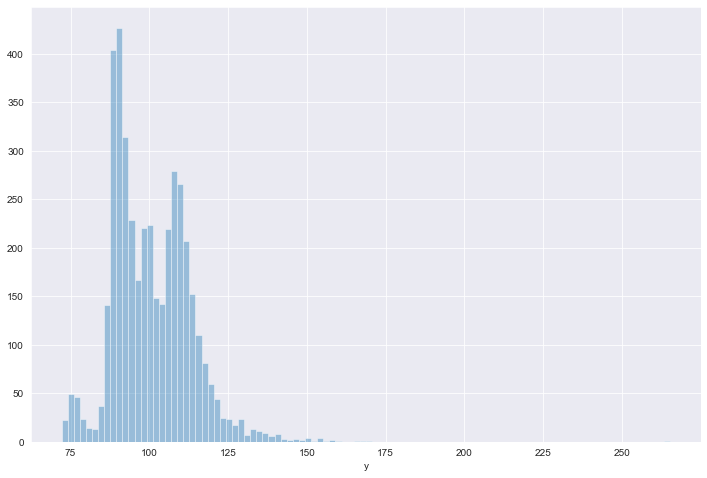

In [134]:
#plotting the distribution of target varibale 'y'
plt.figure(figsize=(12,8))
sns.distplot(train_set["y"], kde=False, bins=100)

<AxesSubplot:xlabel='y'>

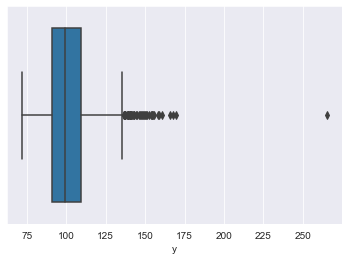

In [135]:
#visualizing the boxplot to see the outliers in the target variable "y"
sns.boxplot(train_set["y"])

### KEY TAKE-AWAYS

    1. The target variable has a standard distribution of about 63 to 136 seconds.
    2. First quartiles = 90.82
    3. Third quartile = 109.01
    4. Inter quartile range = 18.19

<AxesSubplot:ylabel='y'>

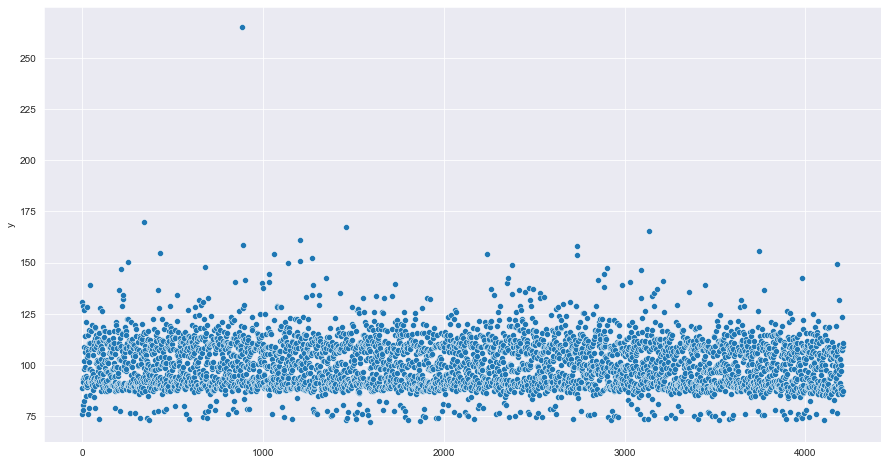

In [136]:
#vizualizing the distribution of target variable "y" with respect to index of rows
plt.figure(figsize=(15,8))
sns.scatterplot(x=train_set.index, y="y", data=train_set)

<AxesSubplot:xlabel='ID', ylabel='y'>

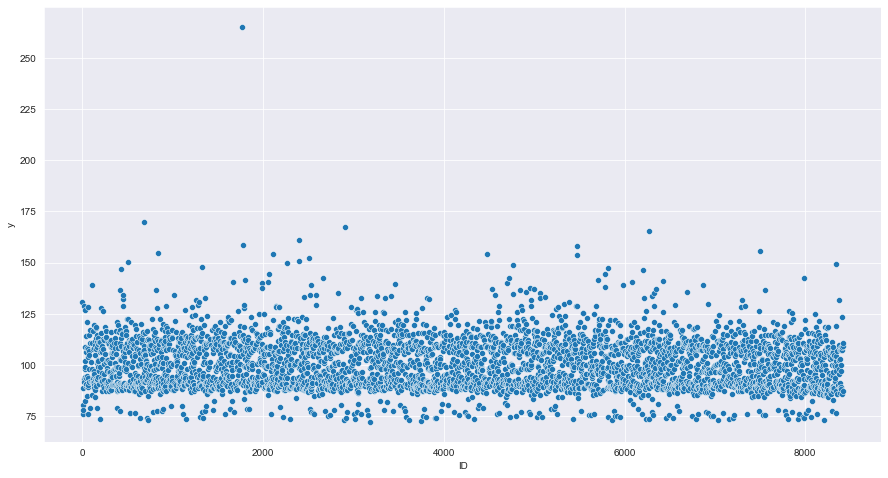

In [137]:
#vizualizing the distribution of target variable "y" with respect to ID of rows
plt.figure(figsize=(15,8))
sns.scatterplot(x=train_set["ID"], y="y", data=train_set)

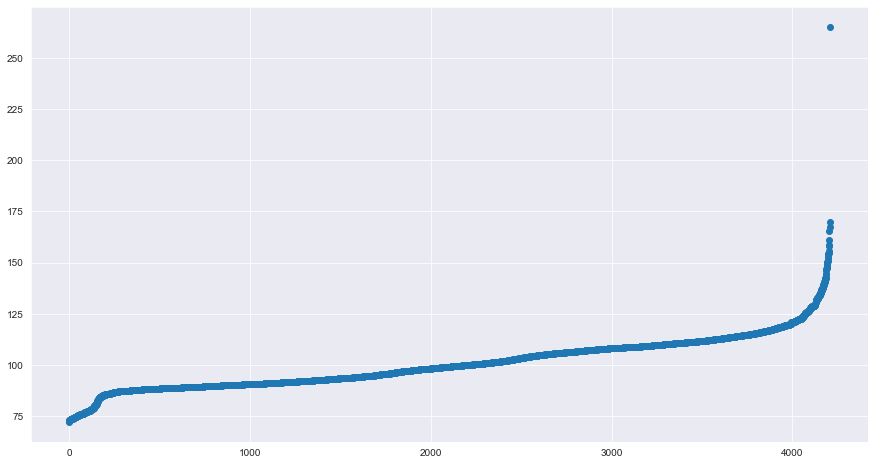

In [138]:
#vizualizing the distribution of target variable "y" in ascending order
plt.figure(figsize=(15,8))
plt.scatter(range(len(np.sort(train_set["y"]))),np.sort(train_set["y"]))

### KEY TAKE-AWAYS

    1. One value (265.32) is much away from other data points.
    2. "y" values are randomly distributed among the rows of data.
    3. "y" does not seem to hold any relationship with index or ID of the data points

# Feature Engineering

### FEATURE CLEANSING
     1. Remove the features of training set having variance=0, as they will not have any effect on our predictions.
     2. Features with variance = 0 for training data : 'X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
                                                           'X293', 'X297', 'X330', 'X347'
     3. Total number of features with variance = 0 : 12

In [139]:
#droping the columns with variance=0
train_set_var_rem = train_set.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'], axis = 1)

In [140]:
#Rechecking to confirm if the columns with variance=0 have been removed
train_set_var_rem.var()[train_set.var()==0].index.values

array([], dtype=object)

### KEY TAKE-AWAYS

    1. The required features with variance=0 have been removed

### ENCODING

    1. Label encode the categorical variables in train and test data set and store in new dataframe

In [141]:
#label encoding of train and test set
train_set_lb_encode=train_set
test_set_lb_encode=test_set
for i in train_set.select_dtypes(['object']).columns:
    lb_enc=LabelEncoder()
    lb_enc.fit(train_set[i].append(test_set[i]).values)
    train_set_lb_encode[i]=lb_enc.transform(train_set[i])
    test_set_lb_encode[i]=lb_enc.transform(test_set[i])

In [142]:
#checkign the training data to confirm the label encoding
train_set_lb_encode

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,37,23,20,0,3,27,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,37,21,22,4,3,31,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,24,24,38,2,3,30,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,24,21,38,5,3,30,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,24,23,38,5,3,14,3,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,10,20,19,2,3,1,3,16,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,36,16,44,3,3,1,7,7,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,10,23,42,0,3,1,6,4,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,11,19,29,5,3,1,11,20,...,0,0,0,0,0,0,0,0,0,0


In [143]:
#checkign the testing data to confirm the label encoding
test_set_lb_encode

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,24,23,38,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,46,3,9,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,24,23,19,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,24,13,38,5,3,32,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,49,20,19,2,3,31,8,12,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,9,9,19,5,3,1,9,4,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,46,1,9,3,3,1,9,24,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,51,23,19,5,3,1,3,22,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,10,23,19,0,3,1,2,16,0,...,0,0,1,0,0,0,0,0,0,0


### KEY TAKE-AWAYS

    1. The categorical features in train and test set have been sucessfully label encoded

### FEATURE-TARGET SPLITTING

    1. Split the original train set furthur into training set and testing set
    2. Extract the target set and feature set for model training

In [144]:
#the target variable "y" has been removed from training set
#the feature "ID" has been removed from training set as ID of the data point should not influence the predictions
x_train_set_lb_encode=train_set_lb_encode.drop(['y', 'ID'], axis = 1)
x_train_set_lb_encode

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,37,23,20,0,3,27,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,37,21,22,4,3,31,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,24,24,38,2,3,30,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,24,21,38,5,3,30,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24,23,38,5,3,14,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,10,20,19,2,3,1,3,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,36,16,44,3,3,1,7,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,10,23,42,0,3,1,6,4,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,11,19,29,5,3,1,11,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
#the target variable "y" has been extracted from training set
y_train_set_lb_encode=train_set_lb_encode[["y"]]
y_train_set_lb_encode

,y
0,130.81
1,88.53
2,76.26
3,80.62
4,78.02
...,...
4204,107.39
4205,108.77
4206,109.22
4207,87.48


In [146]:
#The original training set is furthur split into x_train,x_test,y_train,y_test for training and testing the model
x_train,x_val,y_train,y_val=train_test_split(x_train_set_lb_encode,y_train_set_lb_encode,test_size=0.3,random_state=0)

In [147]:
#checking training dataset
x_train

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
3059,46,1,9,2,3,23,6,8,0,0,...,1,0,0,0,0,0,0,0,0,0
3014,52,3,37,2,3,23,8,9,0,0,...,0,0,1,0,0,0,0,0,0,0
3368,51,16,30,5,3,25,11,23,0,0,...,0,0,0,0,0,0,0,0,0,0
2772,30,1,19,3,3,22,9,9,0,0,...,1,0,0,0,0,0,0,0,0,0
3383,50,23,29,2,3,25,6,18,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,50,1,38,4,3,7,11,9,0,0,...,1,0,0,0,0,0,0,0,0,0
3264,48,20,19,2,3,25,6,5,0,0,...,1,0,0,0,0,0,0,0,0,0
1653,46,3,19,2,3,4,9,9,0,0,...,0,0,1,0,0,0,0,0,0,0
2607,49,20,19,6,3,19,6,4,0,0,...,1,0,0,0,0,0,0,0,0,0


In [148]:
#checking training dataset
y_train

,y
3059,87.22
3014,100.05
3368,105.82
2772,103.68
3383,109.60
...,...
1033,140.41
3264,104.73
1653,102.77
2607,113.94


In [149]:
#the feature "ID" has been removed from testing set as ID of the data point should not influence the predictions
x_test_set_lb_encode=test_set_lb_encode.drop(['ID'], axis = 1)
x_test_set_lb_encode

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,24,23,38,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,46,3,9,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,24,23,19,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,24,13,38,5,3,32,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,49,20,19,2,3,31,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,9,9,19,5,3,1,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,46,1,9,3,3,1,9,24,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,51,23,19,5,3,1,3,22,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,10,23,19,0,3,1,2,16,0,0,...,0,0,1,0,0,0,0,0,0,0


In [150]:
#the feature "ID" has been removed from testing set as ID of the data point should not influence the predictions
x_test_set_lb_encode=test_set_lb_encode.drop(['ID'], axis = 1)
x_test_set_lb_encode

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,24,23,38,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,46,3,9,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,24,23,19,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,24,13,38,5,3,32,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,49,20,19,2,3,31,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,9,9,19,5,3,1,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,46,1,9,3,3,1,9,24,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,51,23,19,5,3,1,3,22,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,10,23,19,0,3,1,2,16,0,0,...,0,0,1,0,0,0,0,0,0,0


### DIMENSIONALITY REDUCTION

    1. Reduce the number features required to build the model by using Principal Component Analysis (PCA)

In [151]:
#Apply PCA on the original training set 
pca_model_1=PCA(svd_solver='auto')
pca_model_1.fit(x_train_set_lb_encode)

PCA()

In [152]:
#displays the cumulative sum of the variance explained by all the features
np.cumsum(pca_model_1.explained_variance_ratio_*100)

array([ 40.86898792,  62.6274956 ,  75.74757645,  86.53109871,
        94.6963466 ,  96.10568687,  96.76663804,  97.15129723,
        97.41158617,  97.62596431,  97.83582139,  98.01620896,
        98.16422546,  98.29538889,  98.40943769,  98.50129413,
        98.58622607,  98.66578527,  98.7354223 ,  98.79826   ,
        98.85548681,  98.91079026,  98.96264547,  99.00813065,
        99.05115801,  99.08955588,  99.12622676,  99.15969282,
        99.19244276,  99.22398209,  99.25328762,  99.28114755,
        99.30766489,  99.33279781,  99.35654627,  99.37856159,
        99.39818133,  99.41722057,  99.43555943,  99.4529547 ,
        99.46953968,  99.48538588,  99.50096316,  99.51641686,
        99.53155519,  99.54513303,  99.55837579,  99.57111142,
        99.58364945,  99.59588619,  99.60766454,  99.61915826,
        99.63031444,  99.64088499,  99.65105156,  99.66062821,
        99.67011384,  99.67923363,  99.68820869,  99.69695239,
        99.70519953,  99.71323763,  99.72094011,  99.72

In [153]:
pca_model_2=PCA(0.98, svd_solver='auto')
pca_model_2.fit(x_train_set_lb_encode)

PCA(n_components=0.98)

In [154]:
pca_model_2.n_components_

12

### KEY TAKE-AWAYS

    1. 12 features can explain 98% of the variance in the data
    2. 376 features are reduced to 12 features to explain 98% of variance in the data set

### PERFORMING PCA

In [155]:
#Performing PCA in the features

#transforming model training data
x_train_pca=pca_model_2.transform(x_train)

#transforming validation feature data
x_val_pca=pca_model_2.transform(x_val)

#transforming original test feature data
X_TEST_pca=pca_model_2.transform(x_test_set_lb_encode)

In [156]:
#checking the shape of the transformed training data set
x_train_pca.shape

(2946, 12)

In [157]:
#checking the shape of the transformed validation feature data
x_val_pca.shape

(1263, 12)

In [158]:
#checking the shape of the transformed original test feature data
X_TEST_pca.shape

(4209, 12)

### KEY TAKE-AWAY

    1. All features in training, validation and testing set have been transformed into 12 new features

   ### MODEL BUILDING
   
       1. Build model using XGBoost
       2. Predict the target variable for test set

In [159]:
#Build XGB model
xgbr_model=XGBRegressor(objective="reg:linear", learning_rate=0.1)
xgbr_model.fit(x_train_pca,y_train)

[23:44:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [160]:
#predictions for the validation set
y_val_preds=xgbr_model.predict(x_val_pca)

In [161]:
#checking the mean squared error for the predictions
print(sqrt(mean_squared_error(y_val, y_val_preds)))

9.99666834414298


In [162]:
#checking the R2 score for the predictions
print((r2_score(y_val,y_val_preds)))

0.42206959477673966


In [163]:
#comparing the training score and testing score
print("Train Score ",xgbr_model.score(x_train_pca,y_train))
print("Validation Score ",xgbr_model.score(x_val_pca,y_val))

Train Score  0.7665039690048165
Validation Score  0.42206959477673966


In [164]:
#predictions for the testing set
y_TEST_preds=xgbr_model.predict(X_TEST_pca)

In [165]:
#checking the predictions for the original test set
y_TEST_preds

array([ 76.920044,  93.76541 ,  76.93008 , ..., 100.39338 , 107.170105,
        93.93597 ], dtype=float32)

### MODEL BUILDING
    1. Build model using Random Forest

In [166]:
#Building a random forest model
rf_model=RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf_model.fit(x_train_pca,y_train)

RandomForestRegressor(max_depth=10, max_features=0.2, min_samples_leaf=4,
                      n_estimators=200, n_jobs=-1, random_state=0)

In [167]:
#Predicting the target for validation set
rf_y_val_preds=rf_model.predict(x_val_pca)

In [168]:
#checking the mean squared error for the predictions
print(sqrt(mean_squared_error(y_val, rf_y_val_preds)))

10.149308512631475


In [169]:
#checking the R2 score for the predictions
print((r2_score(y_val,rf_y_val_preds)))

0.4042858939709707


In [170]:
#comparing the training score and testing score
print("Train Score ",rf_model.score(x_train_pca,y_train))
print("Validation Score ",rf_model.score(x_val_pca,y_val))

Train Score  0.6157777489999734
Validation Score  0.4042858939709707


In [171]:
#predictions for the testing set
rf_y_TEST_preds=rf_model.predict(X_TEST_pca)

#checking the predictions for the original test set
rf_y_TEST_preds

array([ 78.44897571,  94.85882933,  81.03083075, ..., 101.10245242,
       107.46469403,  95.62280812])